In [1]:
# 导入相关库
import numpy as np
import random as rnd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

from collections import Counter # 计数器
from sklearn.tree import DecisionTreeClassifier # 决策树模型
from sklearn.ensemble import RandomForestClassifier # 随机森林分类模型

In [2]:
# 加载单词集
valid_solutions_df = pd.read_csv('valid_solutions.csv')
valid_guesses_df = pd.read_csv('valid_guesses.csv')
valid_solutions_df.head()

,word
0,aback
1,abase
2,abate
3,abbey
4,abbot


{'e': 1233, 'a': 979, 'r': 899, 'o': 754, 't': 729, 'l': 719, 'i': 671, 's': 669, 'n': 575, 'c': 477, 'u': 467, 'y': 425, 'd': 393, 'h': 389, 'p': 367, 'm': 316, 'g': 311, 'b': 281, 'f': 230, 'k': 210, 'w': 195, 'v': 153, 'z': 40, 'x': 37, 'q': 29, 'j': 27}
11575


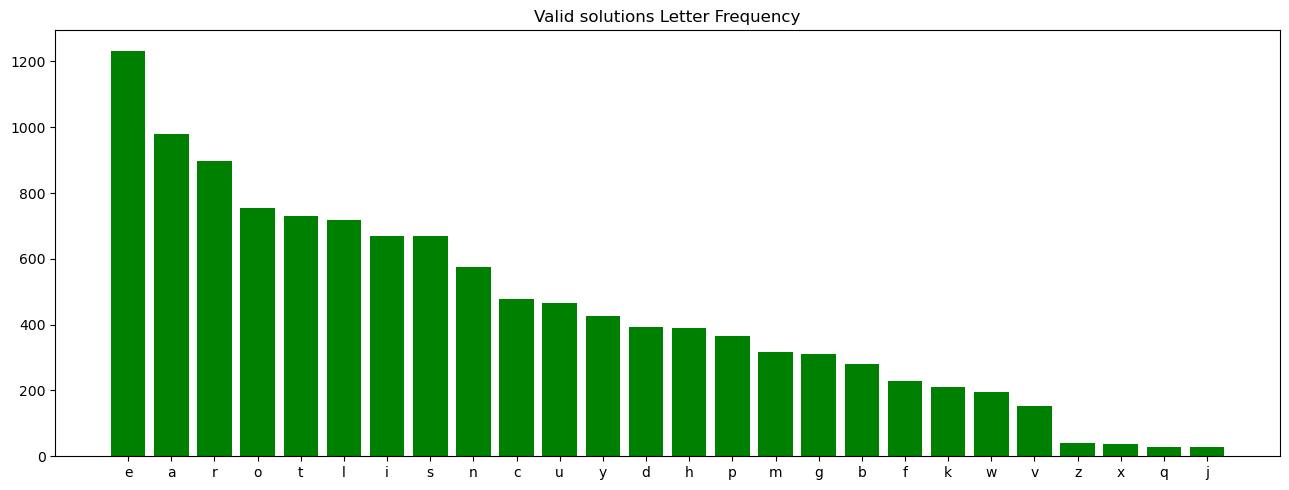

In [3]:
# 统计词频
word_list = valid_solutions_df['word'].to_list()

letter_list = [letter for word in list(word_list) for letter in word]

count = Counter(letter_list)
plt.rc("figure", autolayout=True, figsize=(13, 5))
ax = plt.bar(*zip(*count.most_common()),align='center',color='green')
plt.title("Valid solutions Letter Frequency")

Valid_solutions_Letter_Frequency = dict(count.most_common())
print(Valid_solutions_Letter_Frequency) #得到了词频
total = sum(Valid_solutions_Letter_Frequency.values())
print(total)

In [4]:
# 列出字频最高的aerotl组成的单词
pattern = r'[earotl]{5}'
matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
matching_words

,word
48,alert
57,allot
66,altar
67,alter
92,aorta
119,atoll
629,eater
639,elate
671,error
1102,later


('s', 'e', 'a', 'o', 'r', 'i', 'l', 't', 'n', 'd', 'u', 'm', 'p', 'y', 'c', 'h', 'b', 'g', 'k', 'f', 'w', 'v', 'z', 'j', 'x', 'q') (5996, 5429, 5011, 3684, 3259, 3088, 2652, 2566, 2377, 2060, 2044, 1660, 1652, 1649, 1551, 1371, 1346, 1333, 1295, 885, 844, 541, 394, 264, 251, 83)
53285
{'s': 5996, 'e': 5429, 'a': 5011, 'o': 3684, 'r': 3259, 'i': 3088, 'l': 2652, 't': 2566, 'n': 2377, 'd': 2060, 'u': 2044, 'm': 1660, 'p': 1652, 'y': 1649, 'c': 1551, 'h': 1371, 'b': 1346, 'g': 1333, 'k': 1295, 'f': 885, 'w': 844, 'v': 541, 'z': 394, 'j': 264, 'x': 251, 'q': 83}
53285


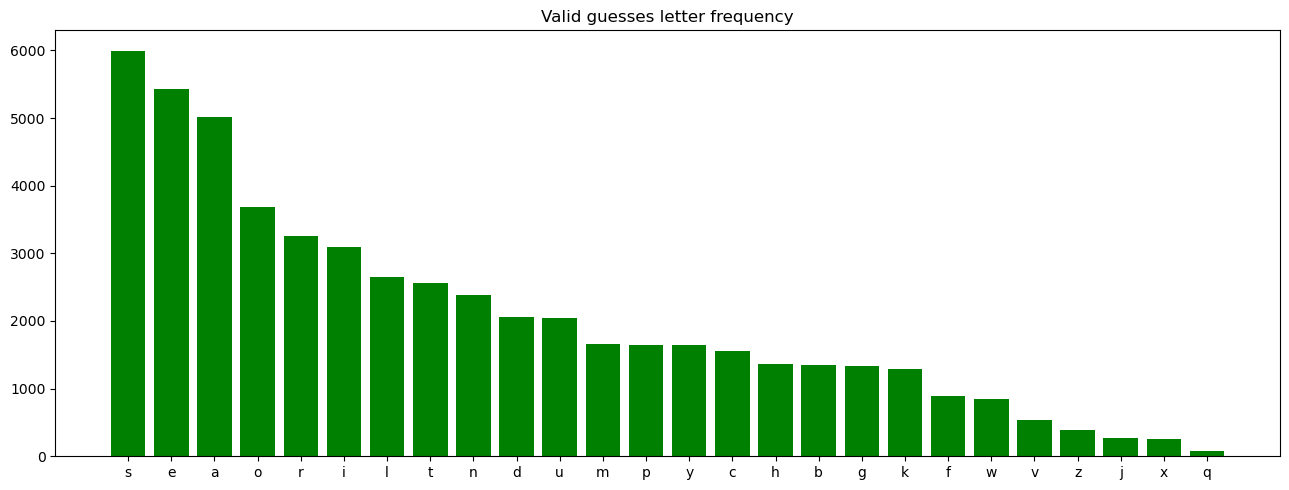

In [5]:
word_list = valid_guesses_df['word'].to_list()

letter_list = [letter for word in list(word_list) for letter in word]

count = Counter(letter_list)
plt.rc("figure", autolayout=True, figsize=(13, 5))
print(*zip(*count.most_common()))
total = 5996+5429+5011+3684+3259+3088+2652+2566+2377+2060+2044+1660+1652+1649+1551+1371+1346+1333+1295+885+844+541+394+264+251+83
print(total)
ax = plt.bar(*zip(*count.most_common()),color='green')
plt.title("Valid guesses letter frequency");

Valid_guesses_letter_frequency = dict(count.most_common())
print(Valid_guesses_letter_frequency) #得到了词频
total = sum(Valid_guesses_letter_frequency.values())
print(total)

{'s': 366, 'c': 198, 'b': 173, 't': 149, 'p': 142, 'a': 141, 'f': 136, 'g': 115, 'd': 111, 'm': 107, 'r': 105, 'l': 88, 'w': 83, 'e': 72, 'h': 69, 'v': 43, 'o': 41, 'n': 37, 'i': 34, 'u': 33, 'q': 23, 'j': 20, 'k': 20, 'y': 6, 'z': 3}
2315


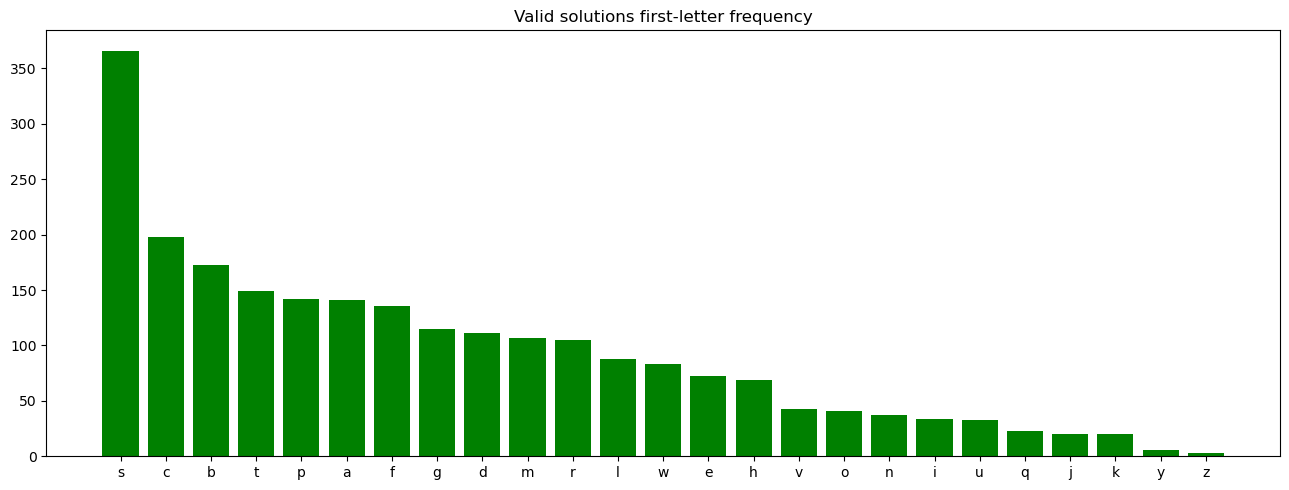

In [6]:
word_list = valid_solutions_df['word'].to_list()

letter_list = [word[0] for word in list(word_list)]

count = Counter(letter_list)                                         
plt.rc("figure", autolayout=True, figsize=(13, 5))
ax = plt.bar(*zip(*count.most_common()), color='green')
plt.title("Valid solutions first-letter frequency");

Valid_solutions_first_letter_frequency = dict(count.most_common())
print(Valid_solutions_first_letter_frequency) #得到了词频
total = sum(Valid_solutions_first_letter_frequency.values())
print(total)

In [7]:
pattern = r's[earotl]{4}'
matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
matching_words

,word
1777,slate
1781,sleet
1836,solar
1902,stale
1904,stall
1908,stare
1910,start
1912,state
1916,steal
1919,steel


Counter({'er': 189, 'in': 129, 'st': 123, 'al': 116, 'ra': 115, 're': 114, 'ar': 107, 'ch': 105, 'ro': 100, 'or': 99, 'le': 94, 'an': 93, 'ea': 89, 'te': 88, 'la': 86, 'sh': 86, 'el': 84, 'ri': 83, 'se': 81, 've': 79, 'un': 79, 'de': 78, 'en': 77, 'lo': 77, 'on': 74, 'as': 71, 'th': 69, 'at': 68, 'ou': 67, 'il': 66, 'ly': 64, 'ne': 63, 'ng': 62, 'ic': 60, 'ee': 59, 'li': 59, 'll': 59, 'ha': 59, 'ta': 59, 'oo': 58, 'pe': 58, 'ma': 57, 'id': 55, 'us': 55, 'cr': 55, 'it': 55, 'ck': 54, 'ge': 54, 'ca': 54, 'to': 53, 'me': 53, 'et': 53, 'ac': 52, 'nt': 52, 'sp': 50, 'ho': 49, 'ad': 49, 'he': 49, 'ty': 49, 'ur': 49, 'ru': 49, 'tr': 48, 'ai': 47, 'co': 46, 'be': 44, 'ut': 44, 'ce': 44, 'ow': 43, 'am': 43, 'ot': 42, 'is': 42, 'lu': 42, 'gr': 41, 'mo': 41, 'pi': 41, 'bl': 40, 'ed': 40, 'ir': 40, 'um': 40, 'dy': 40, 'br': 40, 'bo': 39, 'hi': 39, 'ie': 38, 'ry': 38, 'pa': 38, 'fl': 37, 'rt': 36, 'ss': 36, 'we': 36, 'ba': 35, 'ap': 35, 'ul': 34, 'nd': 34, 'nk': 34, 'na': 34, 'ol': 34, 'cl': 34, 'm

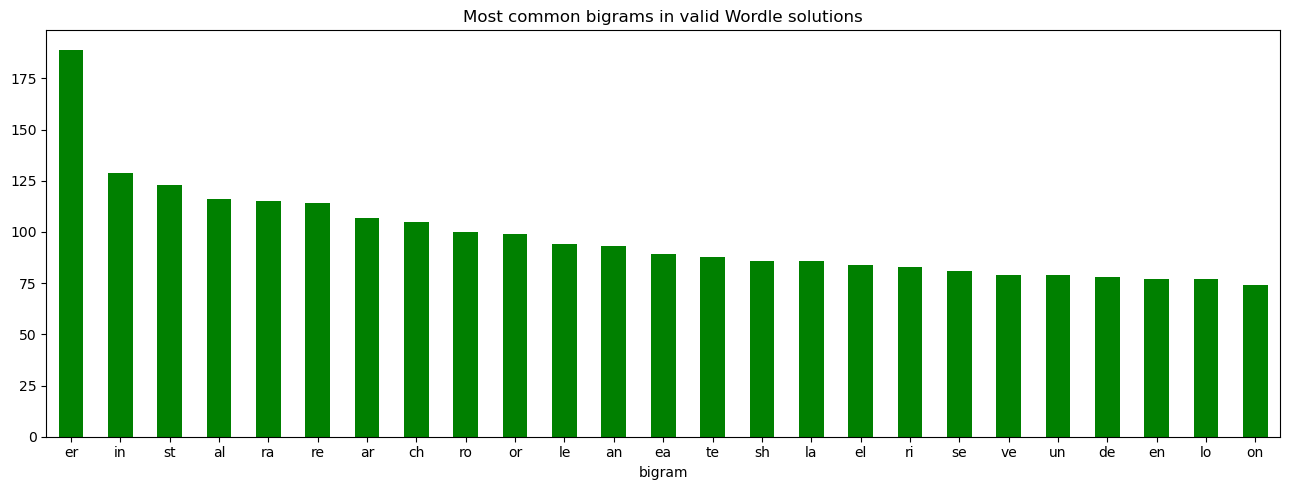

In [8]:
# 常用的双字母组合
word_list = valid_solutions_df['word'].to_list()
bigrams = Counter()
for word in word_list:
    for idx in range(len(word) - 1):
        bigrams[word[idx : idx + 2]] += 1

bigrams_df = pd.DataFrame({'bigram': bigrams.keys(), 'freq': bigrams.values()})
bigrams_df.sort_values(by='freq', ascending=False, inplace=True)

bigrams_df.head(25).plot.bar(x='bigram', y='freq',
                             rot=0, title="Most common bigrams in valid Wordle solutions",
                             figsize=(13, 5), legend=False, color='green');

print(bigrams) #得到了词频
total = sum(bigrams.values())
print(total)

In [9]:
pattern = r'[alinc]{5}'
matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
matching_words

,word
327,canal
1023,iliac
1132,lilac


In [10]:
pattern = r'[^storecanl]an([^storeanl]c|c[^storeanl])'
matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
matching_words

,word
701,fancy
1196,manic
1368,panic


In [11]:
# s - first letter is definitely S
# [^te] - second letter is not T or E
# [^teo] - third letter is not T, E, or O
# [^ter] - third letter is not T, E, or R
# [^te] - fifth letter is not T or E
pattern = r's[^te][^teo][^ter][^te]'
matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
matching_words

,word
1632,sadly
1635,salad
1636,sally
1637,salon
1638,salsa
...,...
1987,swing
1989,swish
1995,swung
1996,synod


In [12]:
# s - first letter is definitely S
# [^te] - second letter is not T or E
# [^teo] - third letter is not T, E, or O
# [^ter] - third letter is not T, E, or R
# [^te] - fifth letter is not T or E
# (?=.*o.*) - O must appear somewhere
# (?=.*r.*) - R must appear somewhere
pattern = r's(?=[^te][^teo][^ter][^te])(?=.*o.*)(?=.*r.*)'
matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
matching_words

,word
1652,savor
1836,solar
1839,sonar


In [13]:
pattern = r's[^ot]o[^nor][^e]'
matching_words = valid_solutions_df.loc[valid_solutions_df['word'].str.match(pattern)]
matching_words

,word
1667,scoff
1668,scold
1674,scour
1675,scout
1676,scowl
1731,shoal
1732,shock
1739,shout
1741,shown
1742,showy
